In [1]:
import pandas as pd
import numpy as np
import pandas_profiling as pp
import sweetviz as sv
import matplotlib.pyplot as plt
data = pd.read_csv("WC_AT.csv")
data.head()

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Waist   109 non-null    float64
 1   AT      109 non-null    float64
dtypes: float64(2)
memory usage: 1.8 KB


In [49]:
data.describe()

,Waist,AT
count,109.000000,109.000000
mean,91.901835,101.894037
std,13.559116,57.294763
min,63.500000,11.440000
25%,80.000000,50.880000
50%,90.800000,96.540000
75%,104.000000,137.000000
max,121.000000,253.000000


In [3]:
data.corr()

,Waist,AT
Waist,1.000000,0.818558
AT,0.818558,1.000000


C:\Users\Sanket\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='Waist', ylabel='Density'>

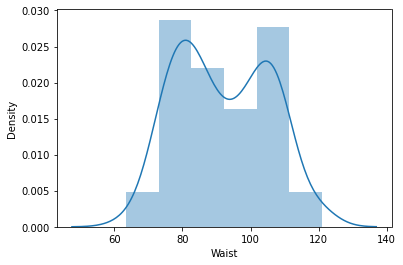

In [4]:
import seaborn as sns
sns.distplot(data['Waist'])

C:\Users\Sanket\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='AT', ylabel='Density'>

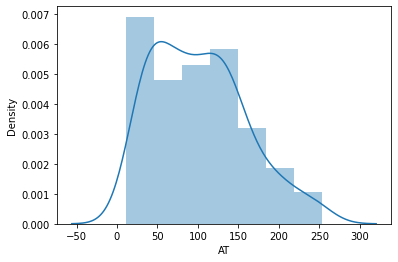

In [5]:
import seaborn as sns
sns.distplot(data['AT'])

In [34]:
import statsmodels.formula.api as smf
model = smf.ols("AT~Waist",data = data).fit()

<AxesSubplot: xlabel='Waist', ylabel='AT'>

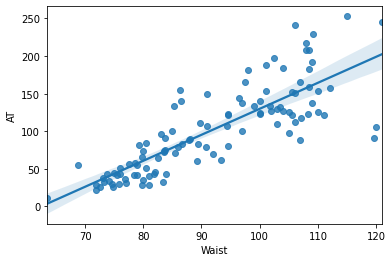

In [53]:
sns.regplot(x="Waist", y="AT", data=data)

In [54]:
#Coefficients
model.params

Intercept   -215.981488
Waist          3.458859
dtype: float64

In [37]:
#t and p values
print(model.tvalues, '\n', model.pvalues)    

Intercept    -9.909103
Waist        14.740376
dtype: float64 
 Intercept    8.197416e-17
Waist        1.618607e-27
dtype: float64


In [38]:
(model.rsquared,model.rsquared_adj)

(0.670036893052843, 0.6669531256981966)

In [11]:
##Predict for new data point¶

In [43]:
newdata=pd.Series([65,150,40])

In [44]:
newdata

0     65
1    150
2     40
dtype: int64

In [45]:
data_pred=pd.DataFrame(newdata,columns=['Waist'])

In [46]:
data_pred

,Waist
0,65
1,150
2,40


In [47]:
model.predict(data_pred)

0      8.844373
1    302.847421
2    -77.627112
dtype: float64